In [1]:
# !pip install tensorflow keras numpy pillow

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import os
import joblib

def train_lr_virality_predictor(training_data_path, test_size=0.2, random_state=42):
    """
    Train a logistic regression model to predict post virality using image embeddings
    
    Args:
        embeddings_path: Path to the numpy file containing ResNet50 embeddings
        virality_data_path: Path to CSV file with image filenames and virality scores
        test_size: Proportion of data to use for testing
        random_state: Random seed for reproducibility
        
    Returns:
        model: Trained linear regression model
        X_test: Test features
        y_test: Test labels
        metrics: Dictionary of evaluation metrics
    """
    # Load virality data
    virality_df = pd.read_parquet(training_data_path)
    
    # Extract features (embeddings) and target (virality score)
    X = virality_df.loc[:, virality_df.columns != 'virality_label']
    y = virality_df['virality_label'].values
    
    # Split into training and testing sets
    print("Creating train-test split...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    
    # Train logistic regression model
    print("Training logistic regression model...")
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate model
    metrics = {
        'train_mse': mean_squared_error(y_train, y_pred_train),
        'test_mse': mean_squared_error(y_test, y_pred_test),
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test)
    }
    
    print("\nModel Performance:")
    print(f"Train MSE: {metrics['train_mse']:.4f}")
    print(f"Test MSE: {metrics['test_mse']:.4f}")
    print(f"Train MAE: {metrics['train_mae']:.4f}")
    print(f"Test MAE: {metrics['test_mae']:.4f}")
    print(f"Train R²: {metrics['train_r2']:.4f}")
    print(f"Test R²: {metrics['test_r2']:.4f}")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual Virality Score')
    plt.ylabel('Predicted Virality Score')
    plt.title('Predicted vs Actual')


Creating train-test split...
Training set: 129 samples
Testing set: 33 samples
Training logistic regression model...

Model Performance:
Train MSE: 0.0000
Test MSE: 0.0303
Train MAE: 0.0000
Test MAE: 0.0303
Train R²: 1.0000
Test R²: 0.7963


/Users/rex/brkfst_assessment/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


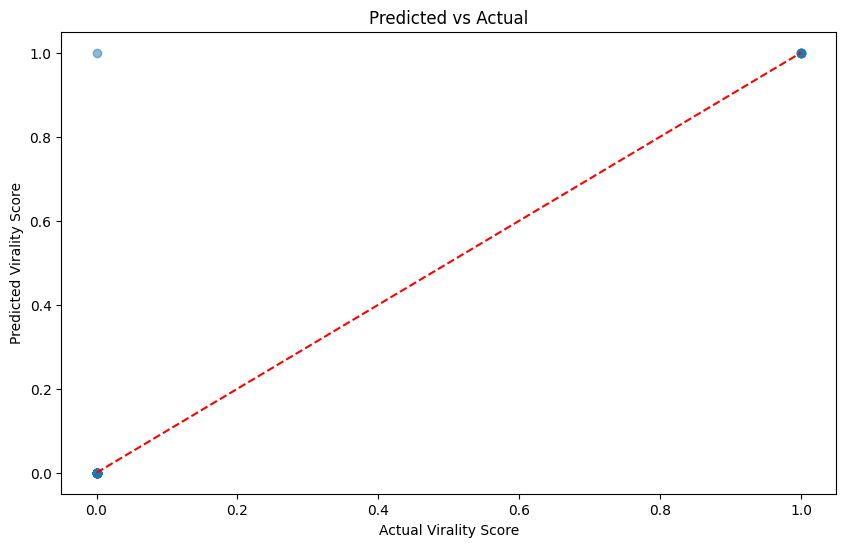

In [16]:
train_lr_virality_predictor('model_training_data.parquet')